## Jude Kappel
### Prof. Schlueter
### CSC-321
### Final Project

### Abstract

This project aims to classify celestial objects using photometric and spectroscopic data sourced from the Sloane Digital Sky Survey (SDSS) using traditional and novel machine learning algorithms.  The methods utilized to achieve classification include a supervised learning approach to probabilistic classifiers such as Naive Bayes, as well as KNN, Neural Networks.  As a result of this study, we find that using a combination of 9 photometric features, this study finds that Neural Networks, Naive Bayes, and KNN all achieve an accuracy of 96.77 percent when using these features. Using only 2 features, KNN offers the best accuracy and computational complexity when compared to contemporary popular algorithms such as Artificial Neural Networks.  The two most important features when classifying photometric data are redshift, the measure of how fast an obect is moving relative to the observer, and z, the size of the infrared filter in the photometric system.

### Introduction

In astronomy, a portion of the work being done focuses on classification of celestial/stellar objects, in an effort to fully understand the universe we live in.  In this project, I've selected a dataset for learning whether a celestial object is a star, a galaxy, or a quasar, which is a black hole in space that has similar qualities of a star.
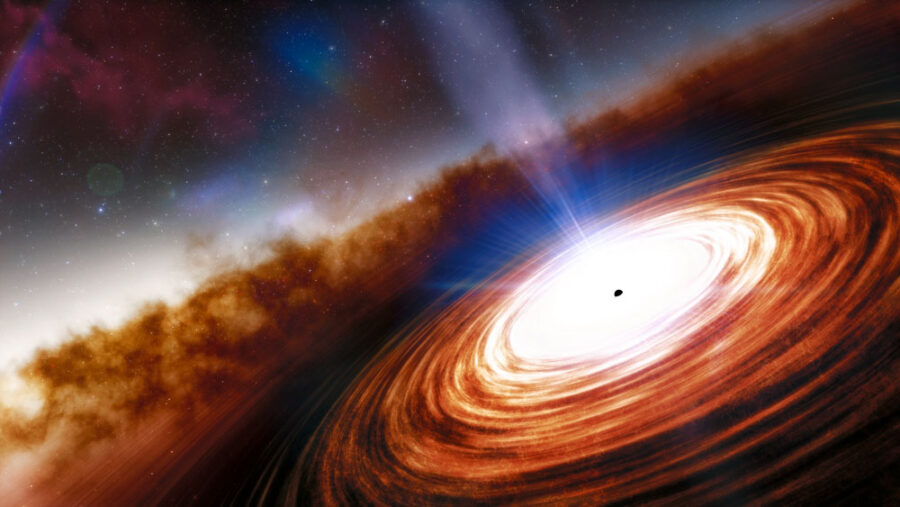

(Quasar)

Image: https://skyandtelescope.org/astronomy-resources/what-is-a-quasar/

Within that idea, I'd like to understand what photometric features matter the most when it comes to predicting the class label of an individual data point.  Which features are better at describing the attributes of a star vs. a quasar vs. a galaxy object? Understanding the relationships between features and which class they belong to can help astronomers make informed decisions when it comes to what features they should be looking at and what data they should be collecting to understand the universe better.

### Literature/State of the Art

There are a number of studies performed that revolve around the use of photometric data to classify celestial objects.  One such study, "Classification of SDSS photometric data using machine learning on a cloud", uses Artificial Neural Networks, SVM, and random Forest to classify objects based on redshift and other photometric data.  They classify 1.1 million observations with an accuracy of 94 percent.  Another such study, "Photometric Classifications of Evolved Massive Stars: Preparing for the Era of Webb and Roman with Machine Learning", highlights the difficulties with performing such an analysis with the high variation inherent with massive stars.  Although they achieve high accuracy, the results become blurry with the large stars.  This study highlights the effectiveness of KNN in classification but also the limitations that comes when utilizing an algorithm that computes Euclidean distance.



Sources:  Acharya, Vishwanath, et al. “Classification of SDSS Photometric Data Using Machine Learning on a Cloud.” Current Science, vol. 115, no. 2, 2018, pp. 249–57. JSTOR, https://www.jstor.org/stable/26978189. Accessed 6 June 2023.
Photometric Classifications of Evolved Massive Stars: Preparing for the Era of Webb and Roman with Machine Learning. Trevor Z. Dorn-Wallenstein et al 2021 ApJ 913 32
DOI 10.3847/1538-4357/abf1f2

Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
file = "star_classification.csv"
path = "/content/drive/My Drive/Colab Notebooks/Data/"
filename = path+file
star_data = pd.read_csv(filename)

### Data

This data comes from the Sloane Digital Sky Survey, and includes a number of instances regarding spectral images and qualities of a number of celestial bodies.

In [ ]:
star_data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
r,c = star_data.shape
print("There are {} instances and {} features in the star_data dataset.".format(r,c))

There are 100000 instances and 18 features in the star_data dataset.


In [ ]:
star_data_grouped = star_data.groupby(['class']).mean()
star_data_grouped

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
class,,,,,,,,,,,,,,,,,
GALAXY,1.237665e+18,177.954727,23.513911,22.587379,20.906101,19.587552,18.851990,18.449156,4513.815998,301.0,3.484650,191.011052,5.482554e+18,0.421596,4869.375608,55423.463605,450.645858
QSO,1.237665e+18,180.474314,26.808621,21.547619,20.926193,20.624089,20.431173,20.266732,4582.701598,301.0,3.522494,177.886979,7.817338e+18,1.719676,6943.071621,56627.547176,489.768419
STAR,1.237664e+18,174.234485,23.498554,20.689805,19.153188,18.946969,18.543736,17.870400,4303.056821,301.0,3.576271,179.933546,4.827882e+18,-0.000115,4287.920348,55131.149115,410.120033


In [ ]:
def get_value_counts(cols):
  list_of_vcs = []
  for col in cols:
    list_of_vcs.append(star_data[col].nunique())
  return list_of_vcs

def print_vals(cols, vals):
  for i in range(len(vals)):
    print("Column: {} Value: {}".format(cols[i], vals[i]))

# identifying if columns uniquely identify data
cols = ["obj_ID", "run_ID", "rerun_ID", "spec_obj_ID", "cam_col", "field_ID", "fiber_ID"]
print_vals(cols, get_value_counts(cols))


Column: obj_ID Value: 78053
Column: run_ID Value: 430
Column: rerun_ID Value: 1
Column: spec_obj_ID Value: 100000
Column: cam_col Value: 6
Column: field_ID Value: 856
Column: fiber_ID Value: 1000


Some of these columns are not useful when it comes to learning unique relationships between these groups. Let's get rid of some of these redundant pieces of data. Regardless of uniqueness, I'd rather delete instances that may uniquely identify data.

In [ ]:
star_data_cleaned = star_data.drop(["obj_ID", "run_ID", "rerun_ID","spec_obj_ID", "field_ID", "fiber_ID", "cam_col", "MJD", "plate"], axis = 1)
star_data_cleaned.describe()

,alpha,delta,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


In [ ]:
star_data_cleaned.isna().any()

alpha       False
delta       False
u           False
g           False
r           False
i           False
z           False
class       False
redshift    False
dtype: bool

The data contains no missing values (Nice).  Now we should remove values that were inputted since there was no data.  These values appear as -9999.

In [ ]:
star_data_cleaned_removed = star_data_cleaned[star_data_cleaned["u"]!=-9999]
star_data_cleaned_removed.describe()

,alpha,delta,u,g,r,i,z,redshift
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,177.628653,24.135552,22.080679,20.631583,19.645777,19.084865,18.768988,0.576667
std,96.502612,19.644608,2.251068,2.037384,1.854763,1.757900,1.765982,0.730709
min,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971
25%,127.517698,5.147477,20.352410,18.965240,18.135795,17.732280,17.460830,0.054522
50%,180.900527,23.646462,22.179140,21.099930,20.125310,19.405150,19.004600,0.424176
75%,233.895005,39.901582,23.687480,22.123775,21.044790,20.396510,19.921120,0.704172
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


Now that we've cleaned out some of the unneccesary features, let's look at some pairwise relationships between our variables, and distinguish each piece by it's class label.

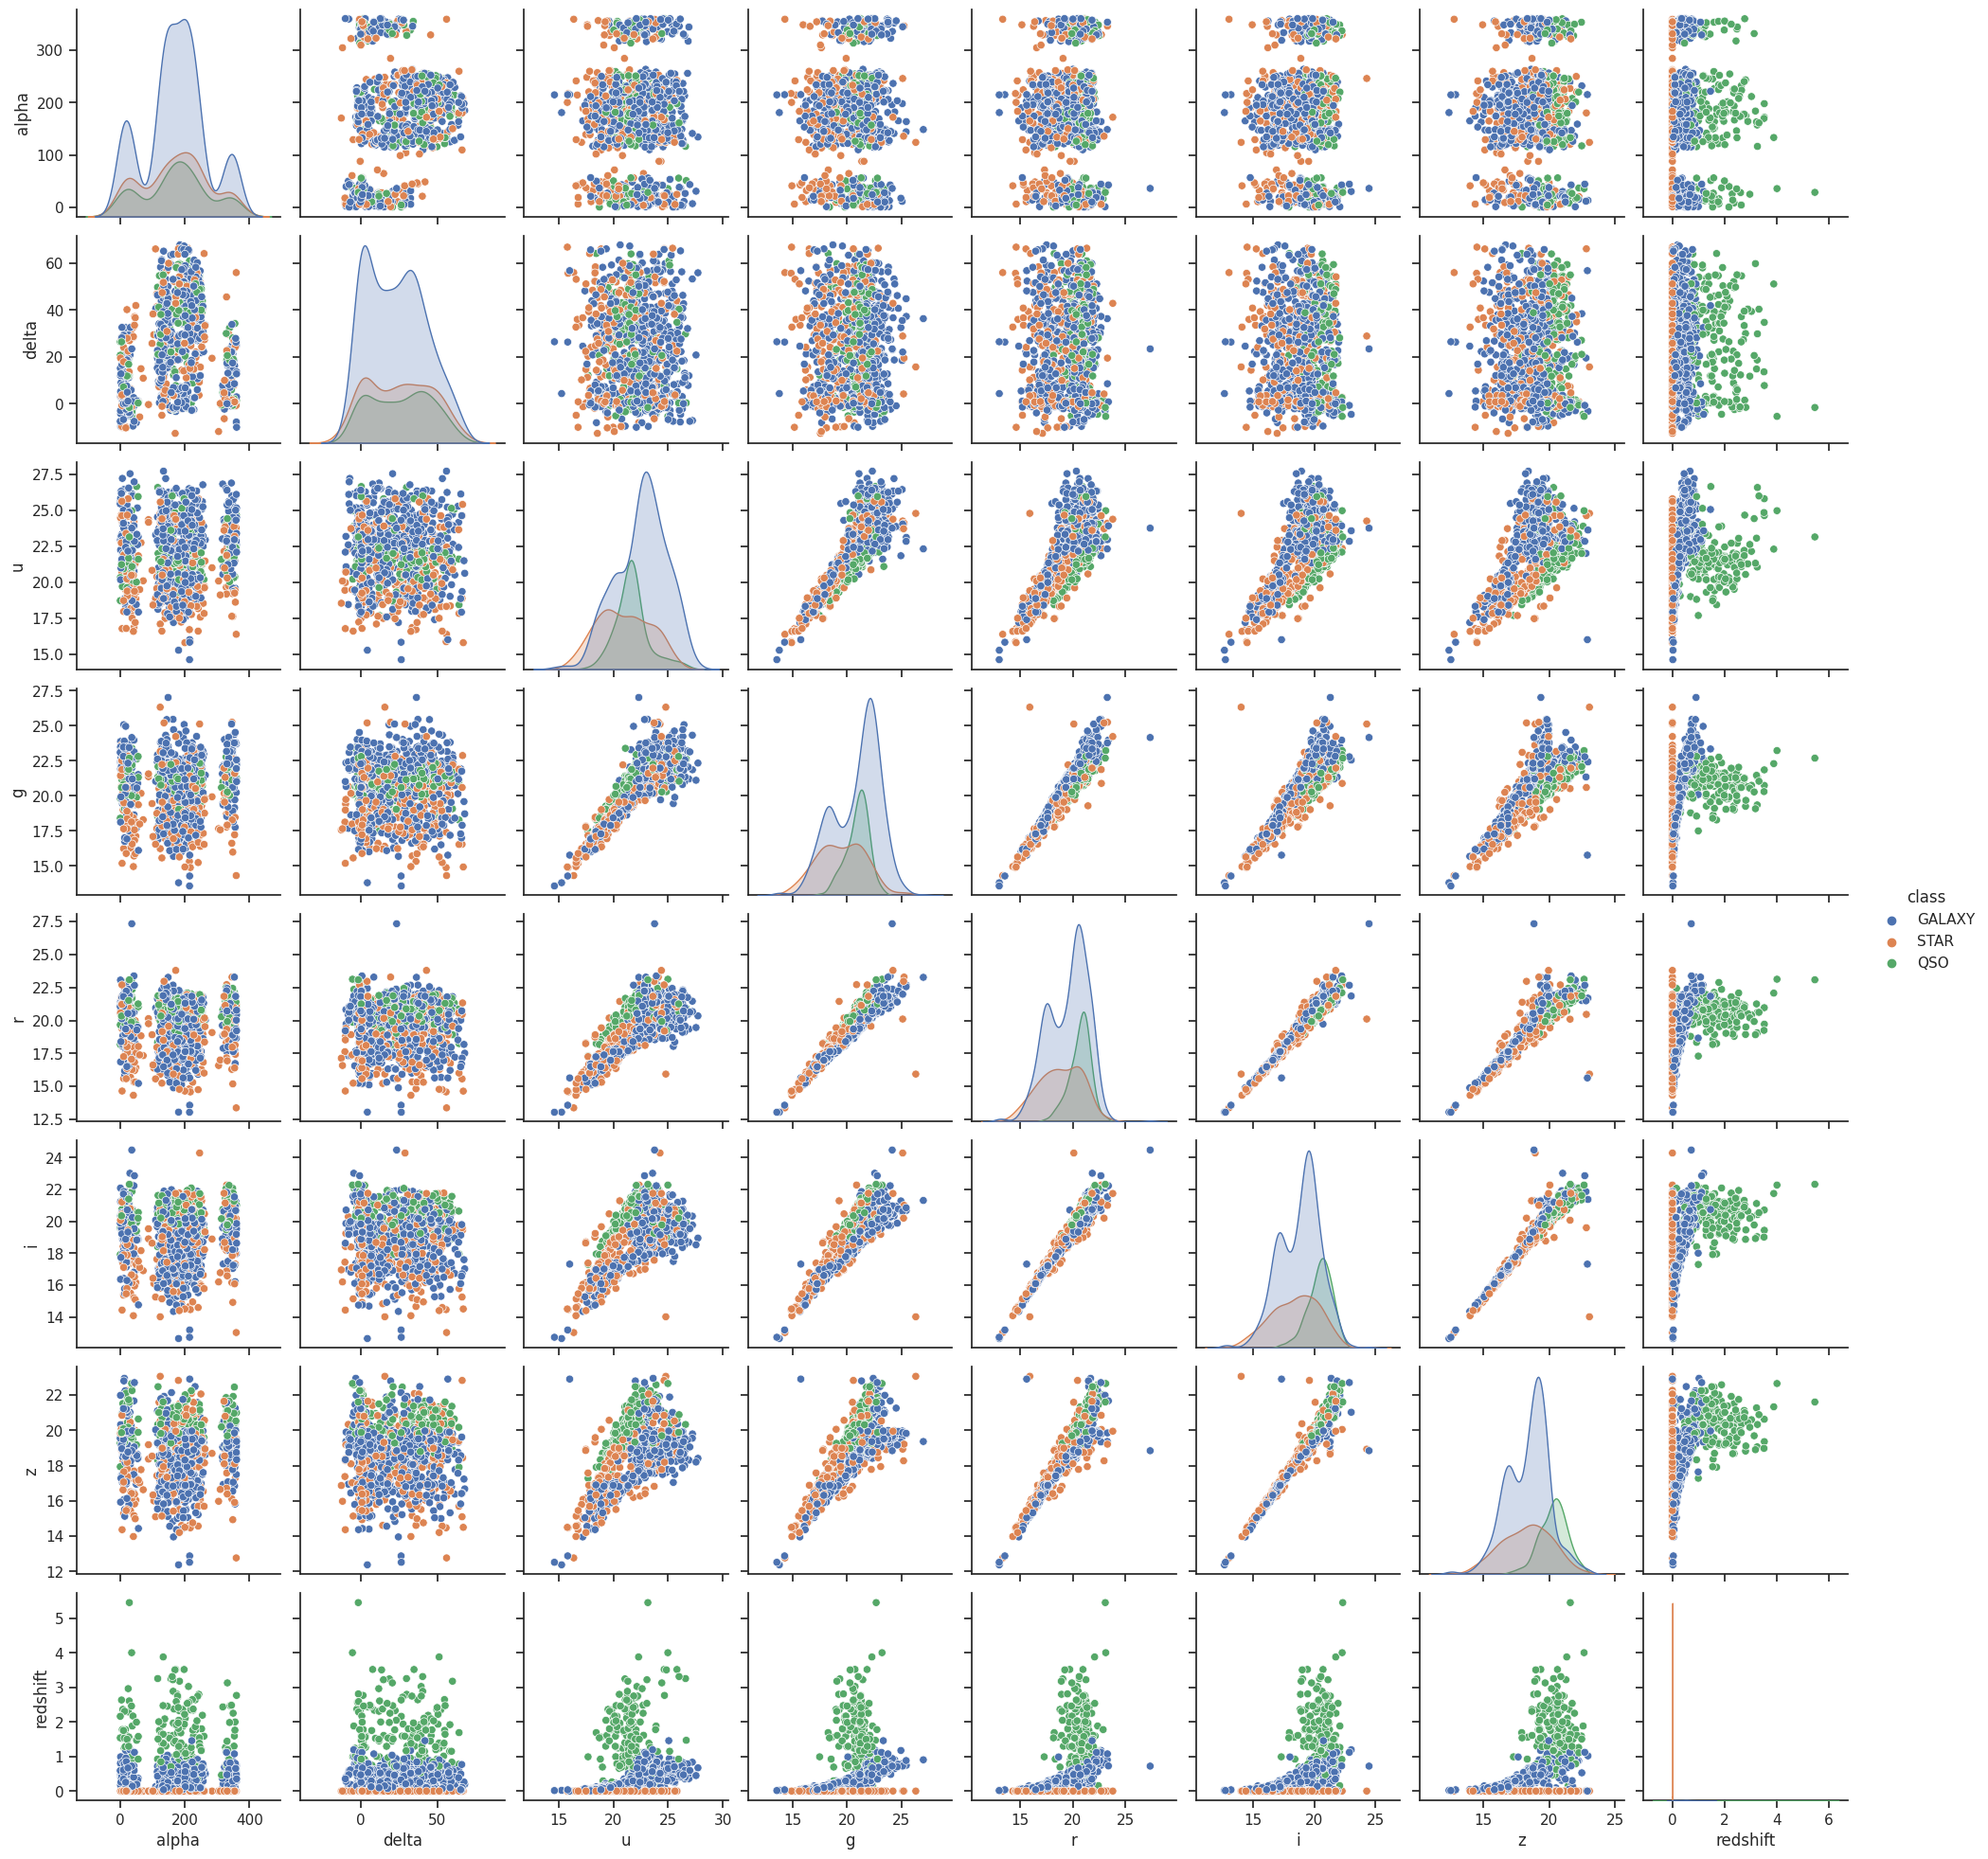

In [ ]:
sns.set(style = "ticks")
sns.pairplot(star_data_cleaned.sample(1000), hue = "class")

Based on a number of the pairwise plots here, we see that many of the variables in this group can be separated based on their locations in the plot, but not necessarily in a linear fashion.  Based on this assumption methods such as Naive Bayes, K Nearest Neighbor, and Neural Networks may provide the most utility in prediction.

### Feature Engineering

In [ ]:
# splitting by class label

galaxy = star_data_cleaned_removed[star_data_cleaned_removed["class"] == "GALAXY"]
quasar = star_data_cleaned_removed[star_data_cleaned_removed["class"] == "QSO"]
star = star_data_cleaned_removed[star_data_cleaned_removed["class"] == "STAR"]

In [ ]:
def get_shape(df):
  return df.shape

df_list = [galaxy, quasar, star]
for i in range(len(df_list)):
  df_shape = get_shape(df_list[i])
  print(df_shape)

(59445, 9)
(18961, 9)
(21593, 9)


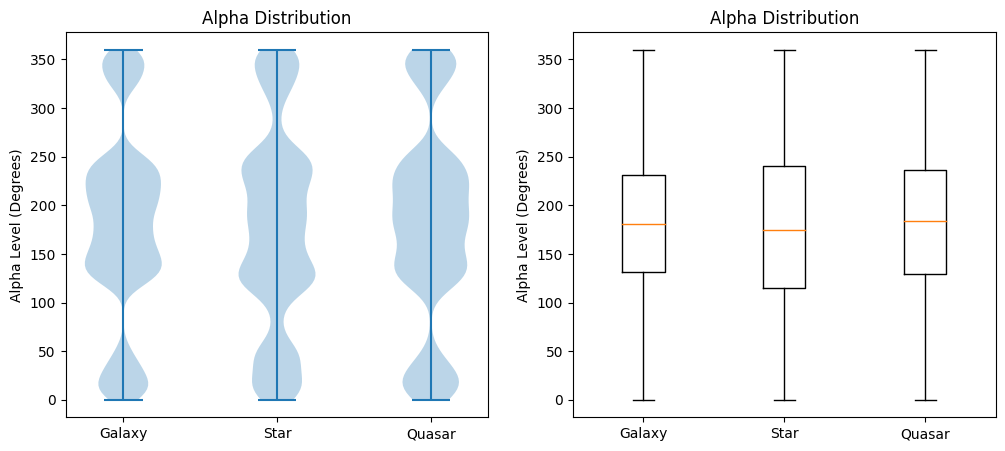

In [ ]:
plt.style.use("default")

fig = plt.figure(figsize = (12,5))

def violin_plot(fig):
  violin = fig.add_subplot(1,2,1)
  violin.violinplot([galaxy["alpha"], star["alpha"], quasar["alpha"]])
  violin.set_xticks([1,2, 3], ["Galaxy", "Star", "Quasar"])
  violin.set_title("Alpha Distribution")
  violin.set_ylabel("Alpha Level (Degrees)")

def boxplot_alpha(fig):
  box = fig.add_subplot(1,2,2)
  box.boxplot([galaxy["alpha"], star["alpha"], quasar["alpha"]])
  box.set_xticks([1, 2, 3], ["Galaxy", "Star", "Quasar"])
  box.set_title("Alpha Distribution")
  box.set_ylabel("Alpha Level (Degrees)")


violin_plot(fig)
boxplot_alpha(fig)

Based on the pairplot above, it may be a good idea to find differences between the class label's different photometric attributes and how it relates to the redshift value.  As celestial bodies move faster and farther away relative to the observer, this translates to an increase in redshift.  If an object is moving towards another object relative to the latter object, ie. if a galaxy or star is moving towards Earth, this is known as blueshift, or negative redshift.  There are a few known extrasolar celestial bodies known to have consistent blueshift, most notably the Andromeda Galaxy.

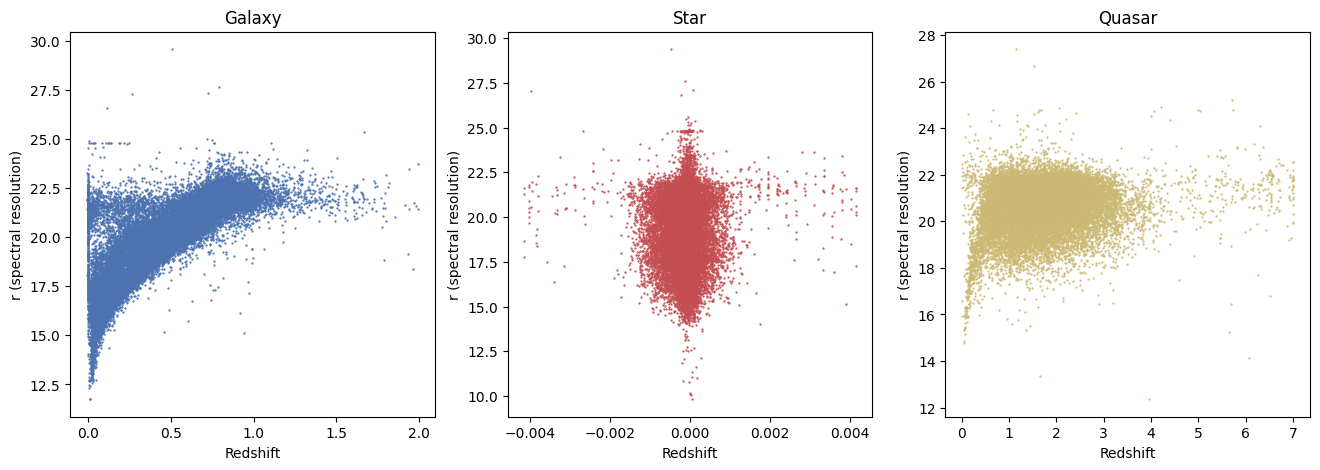

In [ ]:
fig = plt.figure(figsize = (16, 5))

def visualize_redshift(fig):
  scatter_galaxy = fig.add_subplot(1,3,1)
  scatter_galaxy.plot(galaxy["redshift"], galaxy["r"], "bo", markersize = 0.6)
  scatter_galaxy.set_ylabel("r (spectral resolution)" )
  scatter_galaxy.set_xlabel("Redshift")
  scatter_galaxy.set_title("Galaxy")

  scatter_star= fig.add_subplot(1,3,2)
  scatter_star.plot(star["redshift"], star["r"], "ro", markersize = 0.6)
  scatter_star.set_ylabel("r (spectral resolution)")
  scatter_star.set_xlabel("Redshift")
  scatter_star.set_title("Star")

  scatter_qso = fig.add_subplot(1,3,3)
  scatter_qso.plot(quasar["redshift"], quasar["r"], "yo", markersize = 0.6)
  scatter_qso.set_ylabel("r (spectral resolution)")
  scatter_qso.set_xlabel("Redshift")
  scatter_qso.set_title("Quasar")


visualize_redshift(fig)

Based on these visualizations, there are some striking differences between the spectral resolution when related to redshift of each particular group.  Notably, stellar redshift is clustered around zero.  This could be due to their relative proximity to Earth or whether or not they happen to be within a galaxy.

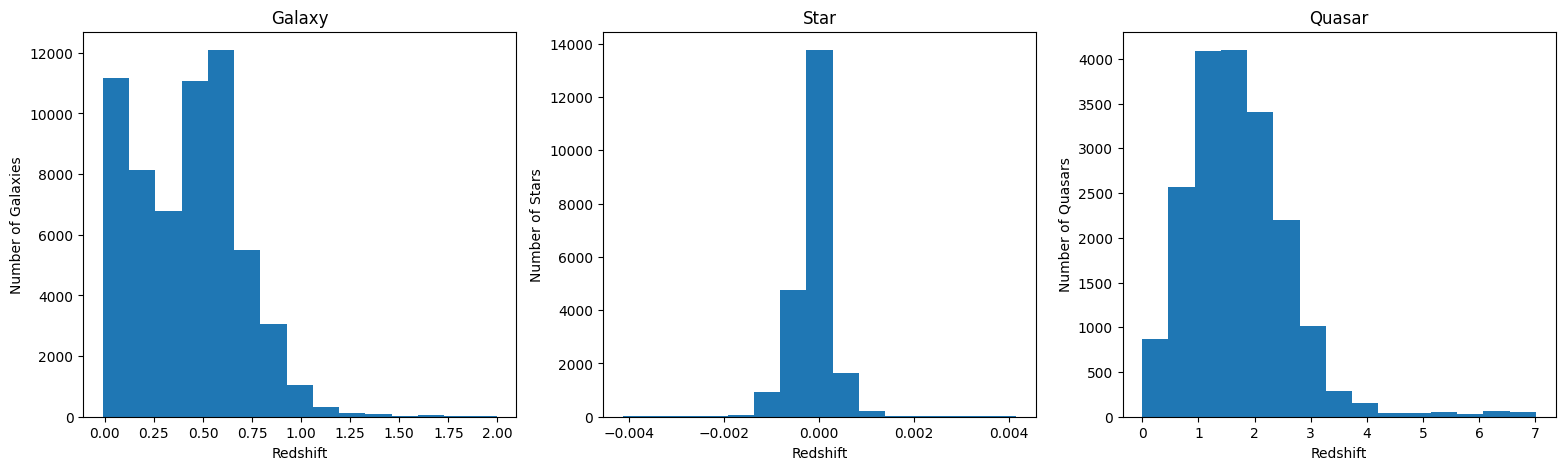

In [ ]:
fig = plt.figure(figsize = (19, 5))

def hist_redshift(fig):
  scatter_galaxy = fig.add_subplot(1,3,1)
  scatter_galaxy.hist(galaxy["redshift"], bins = 15)
  scatter_galaxy.set_xlabel("Redshift")
  scatter_galaxy.set_ylabel("Number of Galaxies")
  scatter_galaxy.set_title("Galaxy")

  scatter_star= fig.add_subplot(1,3,2)
  scatter_star.hist(star["redshift"], bins = 15)
  scatter_star.set_xlabel("Redshift")
  scatter_star.set_ylabel("Number of Stars")
  scatter_star.set_title("Star")

  scatter_qso = fig.add_subplot(1,3,3)
  scatter_qso.hist(quasar["redshift"], bins = 15)
  scatter_qso.set_xlabel("Redshift")
  scatter_qso.set_ylabel("Number of Quasars")
  scatter_qso.set_title("Quasar")


hist_redshift(fig)

In [ ]:
print("Galaxy Average Redshift Value: {:.2f}".format(galaxy["redshift"].mean()))
print("Star Average Redshift Value: {:.2f}".format(star["redshift"].mean()))
print("Quasar Average Redshift Value: {:.2f}".format(quasar["redshift"].mean()))

Galaxy Average Redshift Value: 0.42
Star Average Redshift Value: -0.00
Quasar Average Redshift Value: 1.72


Some key takeaways regarding redshift.  Quasars tend to have a large variance when it comes to redshift but tend to be normally distributed around 2, while stars are clustered somewhat normally around zero.  Galaxies, on the other hand, tend to be distributed somewhere around 0.42, but follow a skewed right distribution.

In [ ]:
import scipy.stats as stats

def t_test(group1, group2):
  t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
  formatted_p_value = "{:.3f}".format(p_val)
  return t_stat, formatted_p_value

# Galaxy Vs Star Redshift

t_statistic, p_value = t_test(galaxy["redshift"], star["redshift"])

print("T-Statistic: ", t_statistic)
print("p-value: ", p_value)

T-Statistic:  388.2025295921853
p-value:  0.000


In [ ]:
# Galaxy Vs Quasar Redshift
t_statistic, p_value = t_test(galaxy["redshift"], quasar["redshift"])

print("T-Statistic: ", t_statistic)
print("p-value: ", p_value)

T-Statistic:  -193.0045005513267
p-value:  0.000


In [ ]:
# Star Vs Quasar Redshift
t_statistic, p_value = t_test(quasar["redshift"], star["redshift"])

print("T-Statistic: ", t_statistic)
print("p-value: ", p_value)

T-Statistic:  259.10856634104283
p-value:  0.000


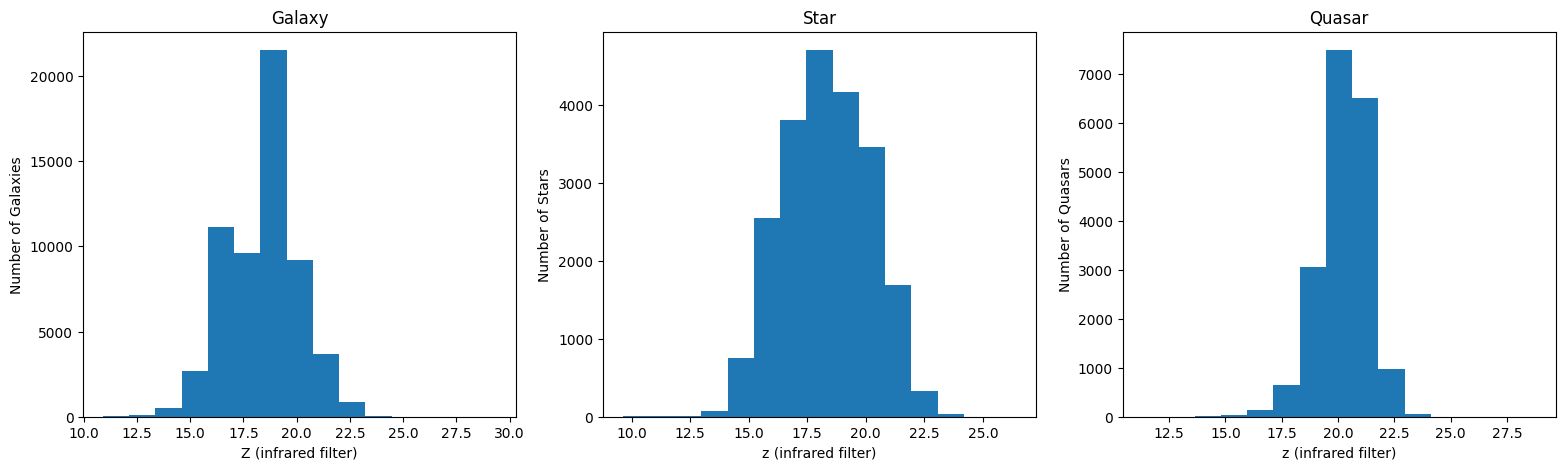

In [ ]:
fig = plt.figure(figsize = (19, 5))

def hist_z(fig):
  scatter_galaxy = fig.add_subplot(1,3,1)
  scatter_galaxy.hist(galaxy["z"], bins = 15)
  scatter_galaxy.set_xlabel("Z (infrared filter)")
  scatter_galaxy.set_ylabel("Number of Galaxies")
  scatter_galaxy.set_title("Galaxy")

  scatter_star= fig.add_subplot(1,3,2)
  scatter_star.hist(star["z"], bins = 15)
  scatter_star.set_xlabel("z (infrared filter)")
  scatter_star.set_ylabel("Number of Stars")
  scatter_star.set_title("Star")

  scatter_qso = fig.add_subplot(1,3,3)
  scatter_qso.hist(quasar["z"], bins = 15)
  scatter_qso.set_xlabel("z (infrared filter)")
  scatter_qso.set_ylabel("Number of Quasars")
  scatter_qso.set_title("Quasar")


hist_z(fig)

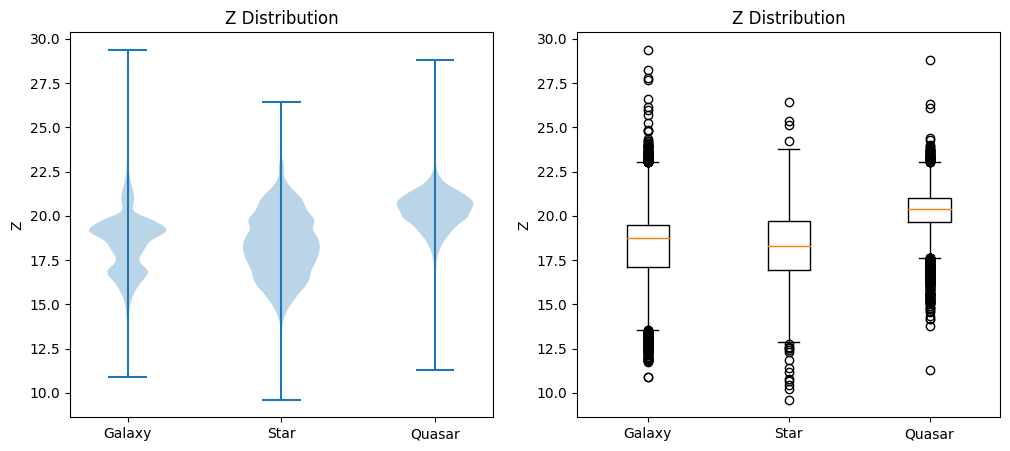

In [ ]:
fig = plt.figure(figsize = (12,5))

def violin_z(fig):
  violin = fig.add_subplot(1,2,1)
  violin.violinplot([galaxy["z"], star["z"], quasar["z"]])
  violin.set_xticks([1,2, 3], ["Galaxy", "Star", "Quasar"])
  violin.set_title("Z Distribution")
  violin.set_ylabel("Z")

def boxplot_z(fig):
  box = fig.add_subplot(1,2,2)
  box.boxplot([galaxy["z"], star["z"], quasar["z"]])
  box.set_xticks([1, 2, 3], ["Galaxy", "Star", "Quasar"])
  box.set_title("Z Distribution")
  box.set_ylabel("Z")


violin_z(fig)
boxplot_z(fig)

In [ ]:
t_statistic, p_value = t_test(galaxy["z"], star["z"])

print("T-Statistic: ", t_statistic)
print("p-value: ", p_value)

T-Statistic:  8.052068019390791
p-value:  0.000


In [ ]:
# Star Vs Quasar Redshift
t_statistic, p_value = t_test(quasar["z"], star["z"])

print("T-Statistic: ", t_statistic)
print("p-value: ", p_value)

T-Statistic:  130.11266879134283
p-value:  0.000


In [ ]:
# Galaxy Vs Quasar Redshift
t_statistic, p_value = t_test(galaxy["z"], quasar["z"])

print("T-Statistic: ", t_statistic)
print("p-value: ", p_value)

T-Statistic:  -173.77805554056644
p-value:  0.000


More Key takeaways: The means of each group are significantly different from each other via the Welch's T test.  The variance of each group is different from each other, with stars having a normal distribution with high variance around 18, and Quasars tightly distributed around 20. Galaxies have much noise, not normally distributed.

We need a way to discretize our class value, since SkLearn prefers our data to have all numeric features.  One of the best ways to do this is by labeling them. For the labeling scheme, galaxy = 0, star = 1, and quasar = 2.  There is no inherent meaning in one being larger than the other.

In [ ]:
star_data_cleaned_removed["class_encode"] = np.where(star_data_cleaned_removed["class"] == "GALAXY", 0, 0)
star_data_cleaned_removed["class_encode"] = np.where(star_data_cleaned_removed["class"] == "STAR", 1, star_data_cleaned_removed["class_encode"])
star_data_cleaned_removed["class_encode"] = np.where(star_data_cleaned_removed["class"] == "QSO", 2, star_data_cleaned_removed["class_encode"])




<ipython-input-26-f074d254acae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star_data_cleaned_removed["class_encode"] = np.where(star_data_cleaned_removed["class"] == "GALAXY", 0, 0)
<ipython-input-26-f074d254acae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star_data_cleaned_removed["class_encode"] = np.where(star_data_cleaned_removed["class"] == "STAR", 1, star_data_cleaned_removed["class_encode"])
<ipython-input-26-f074d254acae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [ ]:
star_data_cleaned_removed["class_encode"].value_counts()

0    59445
1    21593
2    18961
Name: class_encode, dtype: int64

Feature Selection

In [ ]:
X_values = star_data_cleaned_removed.drop(["class", "class_encode"], axis = 1)
y_values = star_data_cleaned_removed["class_encode"]
X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size = 0.33)

In [ ]:
def get_selected_features(k, x_train, y_train, orig_dataset):
  selector = SelectKBest(k = k)
  X_fitted = selector.fit(x_train, y_train)
  x_selected = X_fitted.transform(x_train)
  feature_indices = selector.get_support(indices=True)
  # print(feature_indices)
  selected_feature_names = orig_dataset.columns[feature_indices]
  # print(selected_feature_names)
  X_selected_df = pd.DataFrame(x_selected, columns = selected_feature_names)

  return X_selected_df

# X_select.shape
# X_test_df.shape

Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def scale_data(df):
  scaler = MinMaxScaler()
  scaled = scaler.fit(df)
  transformed = scaled.transform(df)
  transformed_df = pd.DataFrame(transformed, columns = df.columns)
  return transformed_df


### Machine Learning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def compute_scores(y_test, pred_y):
  accuracy = accuracy_score(y_test, pred_y)
  precision = precision_score(y_test, pred_y, average = "macro")
  recall = recall_score(y_test, pred_y, average = "macro")

  return accuracy, precision, recall

#### Experiment 1: 9 Features

Pre Experiment Note:
- Labels for Confusion Matrices:
  - 0 = Galaxy
  - 1 = Star
  - 2 = Quasar

In [ ]:
X_select = get_selected_features(8, X_train, y_train, X_values)
X_test_df = X_test[X_select.columns]


X_train_norm = scale_data(X_select)
X_test_norm = scale_data(X_test_df)


Text(0.5, 1.0, 'Correlation Matrix')

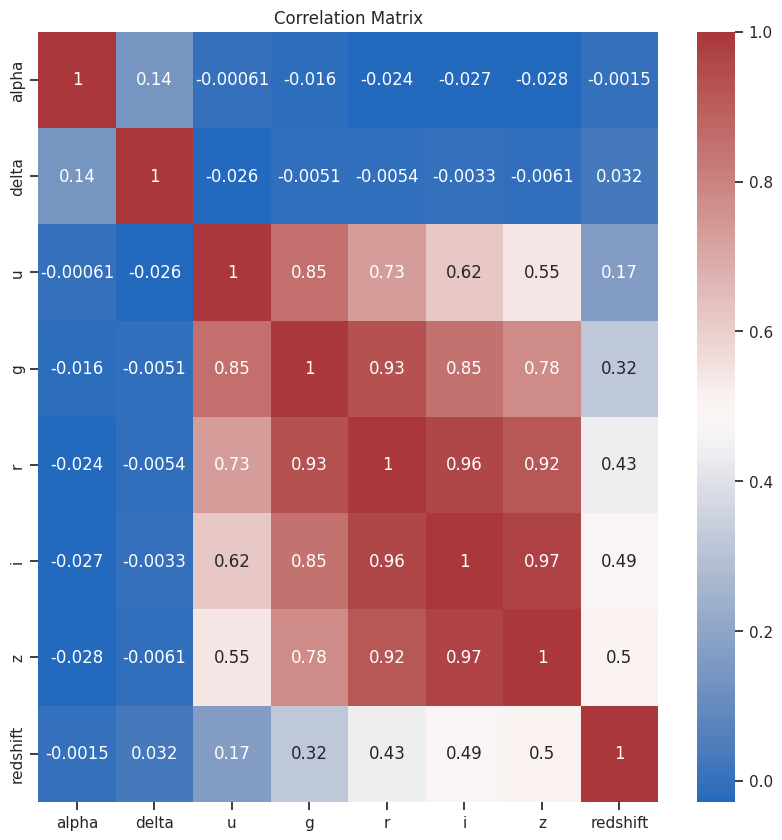

In [ ]:
plt.figure(figsize=(10,10))
sns.set(style="ticks")
sns.heatmap(X_train_norm.corr(),annot=True,cmap='vlag');
plt.title("Correlation Matrix")

In [ ]:
# Baseline ******************************************************************************

zr = DummyClassifier()
zeroR = zr.fit(X_train_norm, y_train)
zr_predY = zeroR.predict(X_test_norm)

acc, prec, rec = compute_scores(y_test, zr_predY)

print("ZeroR Accuracy: {:.2%} \nZeroR Precision: {:.2%}  \nZeroR Recall: {:.2%}".format(acc, prec, rec))

xdata = X_train_norm.values
zr_cv = cross_val_score(zr, xdata, y_train, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("ZR Average CV Score", zr_cv.mean()*100, zr_cv.std()*100))

ZeroR Accuracy: 59.25% 
ZeroR Precision: 19.75%  
ZeroR Recall: 33.33%
ZR Average CV Score: 59.54% (0.00)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Naive Bayesian Classifier ****************************************************
nb = GaussianNB()
naive = nb.fit(X_train_norm, y_train)
nb_predY = naive.predict(X_test_norm)


accuracy, precision, recall = compute_scores(y_test, nb_predY)

print("Accuracy: {:.2%} \nPrecision: {:.2%} \nRecall: {:.2%}".format(accuracy, precision, recall))


xdata = X_train_norm.values
nb_cv = cross_val_score(nb, xdata, y_train, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("Naive Bayes Average CV Score", nb_cv.mean()*100, nb_cv.std()*100))

Accuracy: 74.02% 
Precision: 87.23% 
Recall: 59.72%
Naive Bayes Average CV Score: 92.23% (0.35)


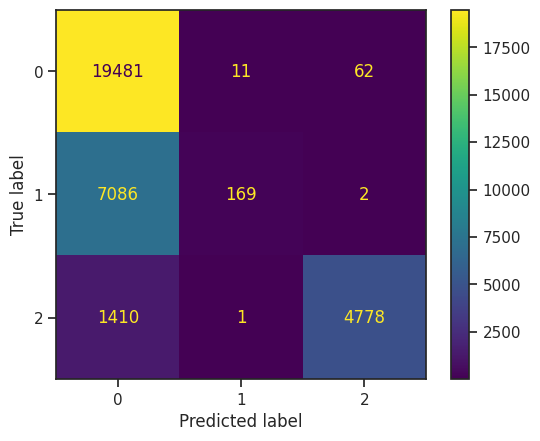

In [ ]:
cm = confusion_matrix(y_test, nb_predY, labels = [0,1,2])
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [ ]:
# Neural Network **************************************************************
nn = MLPClassifier(solver = "adam", max_iter = 100)
neural = nn.fit(X_train_norm, y_train)
nn_predY = neural.predict(X_test_norm)


accuracy, precision, recall = compute_scores(y_test, nn_predY)

print("Accuracy: {:.2%} \nPrecision: {:.2%} \nRecall: {:.2%}".format(accuracy, precision, recall))


xdata = X_train_norm.values
nn_cv = cross_val_score(nn, xdata, y_train, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("Neural Network Average CV Score", nn_cv.mean()*100, nn_cv.std()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 96.39% 
Precision: 96.59% 
Recall: 95.10%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Neural Network Average CV Score: 96.86% (0.24)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.97      0.96     19554
           1       0.97      1.00      0.98      7257
           2       0.92      0.82      0.87      6189

    accuracy                           0.95     33000
   macro avg       0.94      0.93      0.94     33000
weighted avg       0.95      0.95      0.95     33000



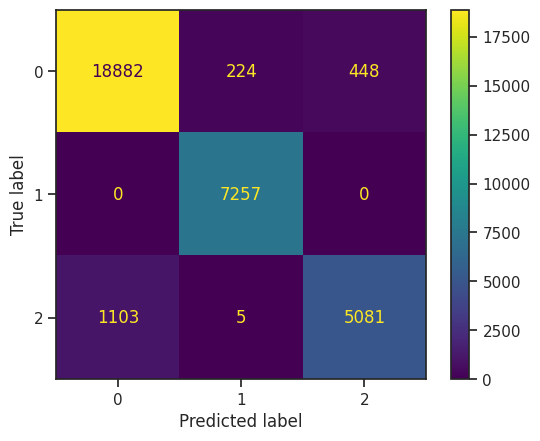

In [ ]:
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, nn_predY, labels = [0,1,2])
disp = ConfusionMatrixDisplay(cm)
report = classification_report(y_test, nn_predY)
print(report)
disp.plot()

Accuracy: 84.62% 
Precision: 86.26% 
Recall: 80.73%
Nearest Neighbor Average CV Score: 92.66% (0.24)
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     19554
           1       0.75      0.77      0.76      7257
           2       0.99      0.75      0.85      6189

    accuracy                           0.85     33000
   macro avg       0.86      0.81      0.83     33000
weighted avg       0.85      0.85      0.85     33000



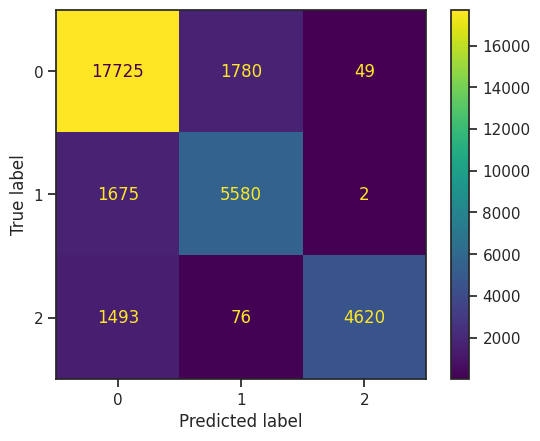

In [ ]:
# KNN **************************************************************************
knn = KNeighborsClassifier()
neighbor = knn.fit(X_train_norm, y_train)
knn_predY = neighbor.predict(X_test_norm)


accuracy, precision, recall = compute_scores(y_test, knn_predY)

print("Accuracy: {:.2%} \nPrecision: {:.2%} \nRecall: {:.2%}".format(accuracy, precision, recall))


xdata = X_train_norm.values
knn_cv = cross_val_score(knn, xdata, y_train, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("Nearest Neighbor Average CV Score", knn_cv.mean()*100, nn_cv.std()*100))

cm = confusion_matrix(y_test,knn_predY, labels = [0,1,2])
disp = ConfusionMatrixDisplay(cm)
report = classification_report(y_test, knn_predY)
print(report)
disp.plot()

Text(0, 0.5, 'Accuracy')

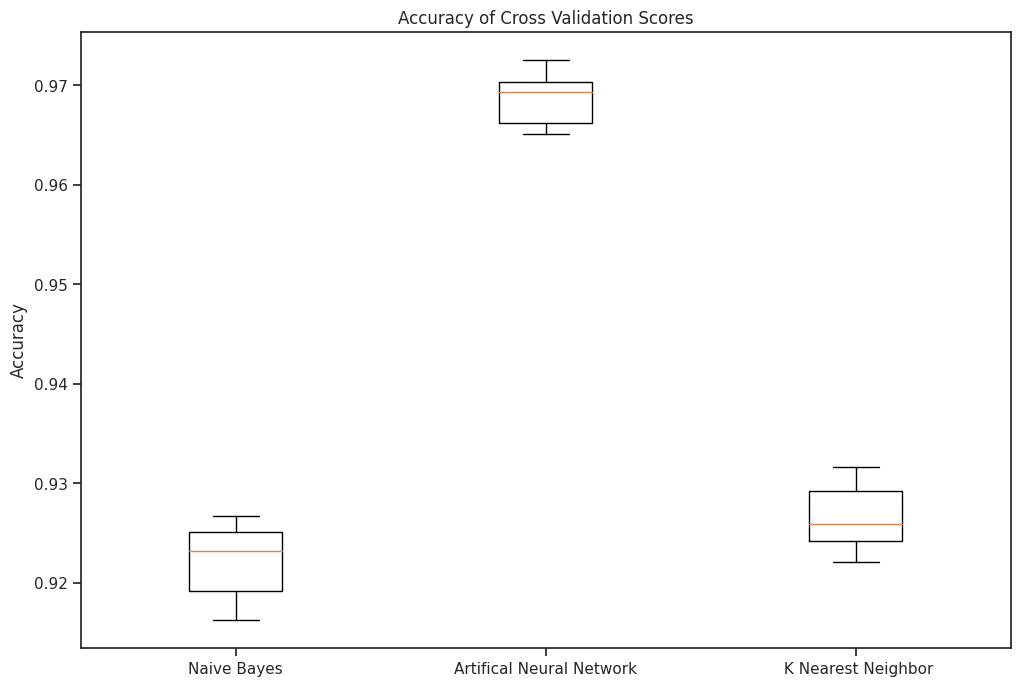

In [ ]:
plt.figure(figsize = (12,8))
plt.boxplot([nb_cv, nn_cv, knn_cv])
plt.title("Accuracy of Cross Validation Scores")
plt.xticks([1,2,3],["Naive Bayes", "Artifical Neural Network", " K Nearest Neighbor"])
plt.ylabel("Accuracy")

On average, the Artificial Neural Network performs the best when compared to the other algorithms utilized in this experiment.  However, it should be noted that the 10 fold stratified cross validation takes SIGNIFICANTLY longer than that of the other algorithms, in which KNN would be better since it offers similar accuracy and dramatically better time performance.

#### Experiment 2: 2 Features

In [ ]:
X_select = get_selected_features(2, X_train, y_train, X_values)
X_test_df = X_test[X_select.columns]


X_train_norm = scale_data(X_select)
X_test_norm = scale_data(X_test_df)


Text(0.5, 1.0, 'Correlation Matrix')

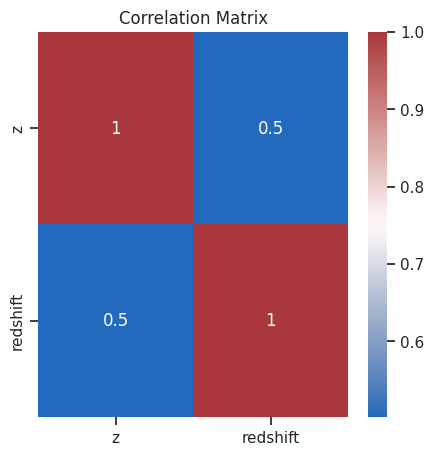

In [ ]:
plt.figure(figsize=(5,5))
sns.set(style="ticks")
sns.heatmap(X_train_norm.corr(),annot=True,cmap='vlag');
plt.title("Correlation Matrix")

In [ ]:
# Baseline ******************************************************************************

zr = DummyClassifier()
zeroR = zr.fit(X_train_norm, y_train)
zr_predY = zeroR.predict(X_test_norm)

acc, prec, rec = compute_scores(y_test, zr_predY)

print("ZeroR Accuracy: {:.2%} \nZeroR Precision: {:.2%}  \nZeroR Recall: {:.2%}".format(acc, prec, rec))

xdata = X_train_norm.values
zr_cv = cross_val_score(zr, xdata, y_train, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("ZR Average CV Score", zr_cv.mean()*100, zr_cv.std()*100))

ZeroR Accuracy: 59.25% 
ZeroR Precision: 19.75%  
ZeroR Recall: 33.33%
ZR Average CV Score: 59.54% (0.00)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Naive Bayesian Classifier ****************************************************
nb = GaussianNB()
naive = nb.fit(X_train_norm, y_train)
nb_predY = naive.predict(X_test_norm)


accuracy, precision, recall = compute_scores(y_test, nb_predY)

print("Accuracy: {:.2%} \nPrecision: {:.2%} \nRecall: {:.2%}".format(accuracy, precision, recall))


xdata = X_train_norm.values
nb_cv = cross_val_score(nb, xdata, y_train, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("Naive Bayes Average CV Score", nb_cv.mean()*100, nb_cv.std()*100))

Accuracy: 72.92% 
Precision: 84.48% 
Recall: 59.30%
Naive Bayes Average CV Score: 93.81% (0.28)


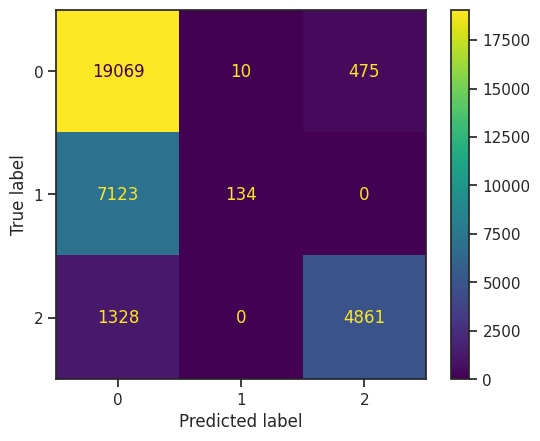

In [ ]:
cm = confusion_matrix(y_test, nb_predY, labels = [0,1,2])
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [ ]:
# Neural Network **************************************************************
nn = MLPClassifier(solver = "adam", max_iter = 100)
neural = nn.fit(X_train_norm, y_train)
nn_predY = neural.predict(X_test_norm)


accuracy, precision, recall = compute_scores(y_test, nn_predY)

print("Accuracy: {:.2%} \nPrecision: {:.2%} \nRecall: {:.2%}".format(accuracy, precision, recall))


xdata = X_train_norm.values
nn_cv = cross_val_score(nn, xdata, y_train, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("Neural Network Average CV Score", nn_cv.mean()*100, nn_cv.std()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 94.61% 
Precision: 94.44% 
Recall: 92.89%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Neural Network Average CV Score: 94.59% (0.28)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.97      0.96     19554
           1       0.97      1.00      0.98      7257
           2       0.92      0.82      0.87      6189

    accuracy                           0.95     33000
   macro avg       0.94      0.93      0.94     33000
weighted avg       0.95      0.95      0.95     33000



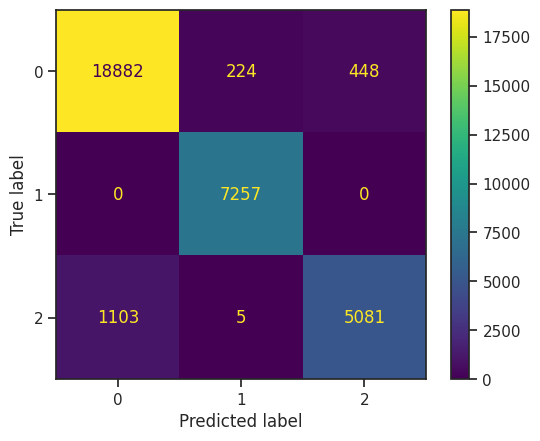

In [ ]:
cm = confusion_matrix(y_test, nn_predY, labels = [0,1,2])
disp = ConfusionMatrixDisplay(cm)
report = classification_report(y_test, nn_predY)
print(report)
disp.plot()

Accuracy: 92.59% 
Precision: 91.12% 
Recall: 91.81%
Nearest Neighbor Average CV Score: 94.23% (0.28)
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     19554
           1       0.97      0.99      0.98      7257
           2       0.82      0.83      0.83      6189

    accuracy                           0.93     33000
   macro avg       0.91      0.92      0.91     33000
weighted avg       0.93      0.93      0.93     33000



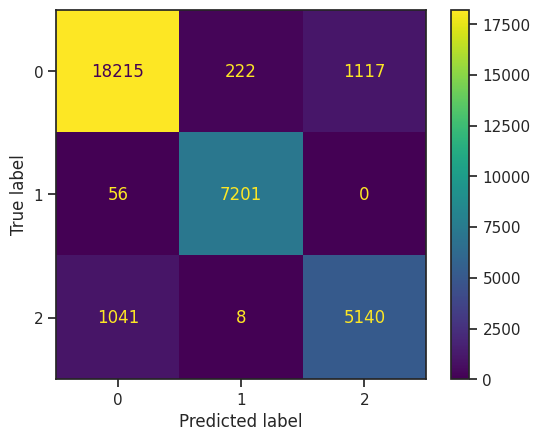

In [ ]:
# KNN **************************************************************************
knn = KNeighborsClassifier()
neighbor = knn.fit(X_train_norm, y_train)
knn_predY = neighbor.predict(X_test_norm)


accuracy, precision, recall = compute_scores(y_test, knn_predY)

print("Accuracy: {:.2%} \nPrecision: {:.2%} \nRecall: {:.2%}".format(accuracy, precision, recall))


xdata = X_train_norm.values
knn_cv = cross_val_score(knn, xdata, y_train, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("Nearest Neighbor Average CV Score", knn_cv.mean()*100, nn_cv.std()*100))

cm = confusion_matrix(y_test,knn_predY, labels = [0,1,2])
disp = ConfusionMatrixDisplay(cm)
report = classification_report(y_test, knn_predY)
print(report)
disp.plot()

The KNN Classifier performs well under the 2 feature model, particularly with stellar and galaxy classification.  It achieved near perfect stellar classification, and outperformed the ANN in regards to the quasar classification.

It should be noted that these scores may vary due to the nature of cross validation.

Text(0, 0.5, 'Accuracy')

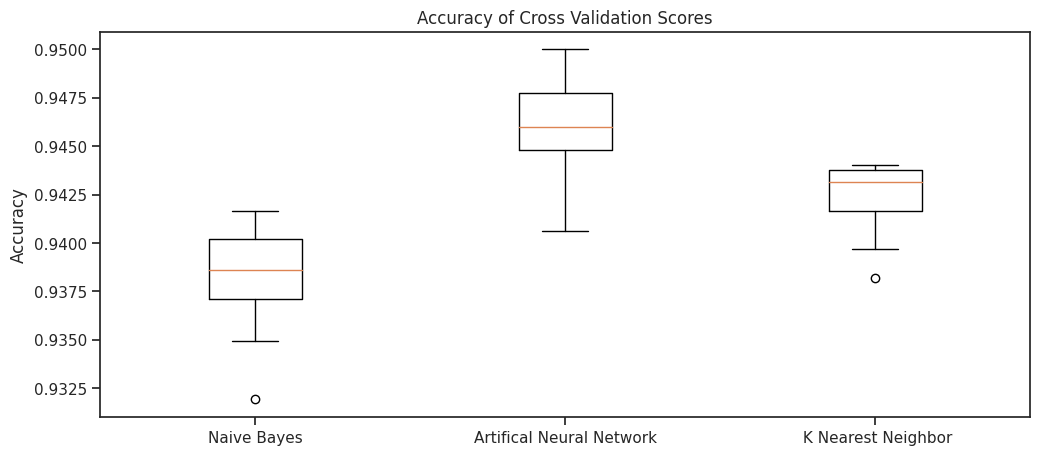

In [ ]:
plt.figure(figsize = (12,5))
plt.boxplot([nb_cv, nn_cv, knn_cv])
plt.title("Accuracy of Cross Validation Scores")
plt.xticks([1,2,3],["Naive Bayes", "Artifical Neural Network", " K Nearest Neighbor"])
plt.ylabel("Accuracy")

The Artificial Neural Network again performs better here than both the naive bayes classifier and KNN classifier. Due to the high computational complexity mentioned earlier, the KNN may still be a better choice due to the fact that this classifier is much faster without much performance loss.  The Artificial Neural Network performs better with precision, recall and accuracy, getting 100 percent of stars right, but the KNN only gets 56 wrong out of over 7200.  The ANN struggles more with classifying quasars correctly, getting just about 5080 correct, while the KNN outperforms by classifying around 5140 correct.  Given the abundance of galaxies and quasars in the dataset, it makes more sense to pick the KNN.

### Conclusions



This paper finds that the most important features when analyzing photometric data of celestial bodies is the redshift and the Z value, or the value of the infrared filter on the image.  This paper finds that including just those two features classifies the data with around 93 percent accuracy.  The other 7 features, declination/ascension angle, and other photometric data regarding filter type only pushes the accuracy of the classifers forward about 2-3 percent, a trade off that doesnt really seem worth it in the context of the computational complexity associated with this learning task, and the lack of precision when it comes to differentiating stars from galaxies from quasars, as noted in the confusion matrices.

However, the ANN does address a key limitation mentioned in the second paper above.  Using both the two feature model and 9 feature model, the ANN classifies 100 percent of stars correctly, regardless of size.  This type of ML model can be used very effectively if you want an accurate star classification.  KNN Struggles MORE under the 9 feature model than it does under the two feature model in this case.

A note about ANNs:  While the ANN cross validation scores average around 97 percent with the full feature set, this paper finds that the time complexity is just not worth the additional time it takes to run. Perhaps given some other condition this may not be the case, but considering the composition of the dataset (mostly galaxies), and the fact that the KNN has the potential to outperform the ANN when it comes to classifying galaxies, this makes the most sense.



Data Source: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?resource=download